/tmp/ipykernel_2602815/464111058.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x="Motif_Score_Level", y="log2FoldChange", data=result_df_hek, palette="YlGnBu", ci=95)
/tmp/ipykernel_2602815/464111058.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Motif_Score_Level", y="log2FoldChange", data=result_df_hek, palette="YlGnBu", ci=95)


Low vs Medium U-stat: 6691462.0, p-value: 4.568581393053848e-21
Medium vs High U-stat: 7424111.0, p-value: 0.04037465995298073


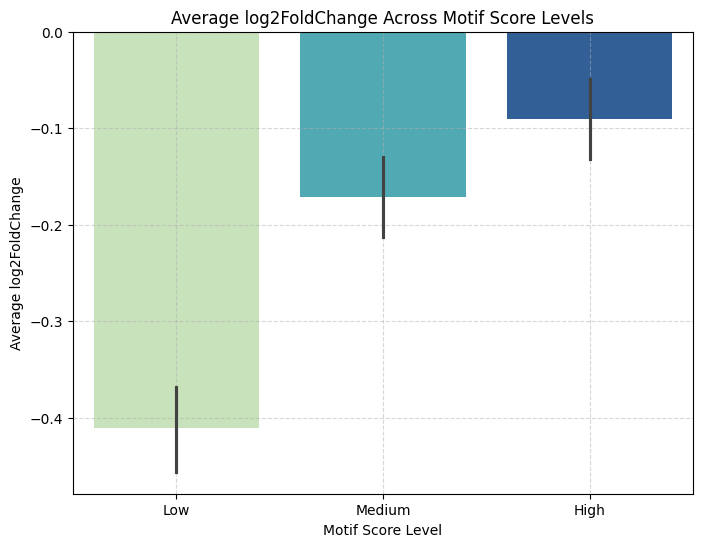

In [4]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Load motif scores
motif_df = pd.read_csv("RBP_6kmer_format.csv")  # Update filename if needed

# Load sequence data
hek_df = pd.read_csv("/home/yg2895/media/protein/yg2895/ASO-lib-20250102/motif_analyse/oligo_FC_hek.csv")  # Update filename if needed

# Convert motif scores into a dictionary {6-mer: score}
motif_dict = dict(zip(motif_df["Motif"], motif_df["Score"]))

# Function to extract all 6-mers from position 16-285
def extract_6mers(sequence):
    trimmed_seq = sequence[15:285]  # Extract 16-285 (Python index starts at 0)
    return [trimmed_seq[i:i+6] for i in range(len(trimmed_seq) - 5)]

# Initialize list to store matched scores
matched_data = []

# Process each sequence in the sequence data file
for _, row in hek_df.iterrows():
    sequence = row["Sequence"]
    log2FC = row["log2FoldChange"]

    # Extract 6-mers
    kmers = extract_6mers(sequence)

    # Match 6-mers with known motif scores
    matched_scores = [motif_dict[kmer] for kmer in kmers if kmer in motif_dict]

    # Store results if matches found
    if matched_scores:
        avg_score = sum(matched_scores) / len(matched_scores)  # Average score per sequence
        matched_data.append({"log2FoldChange": log2FC, "Avg_Motif_Score": avg_score})

# Convert results to DataFrame
result_df_hek = pd.DataFrame(matched_data)

# Bin motif scores into categories (Low, Medium, High)
result_df_hek["Motif_Score_Level"] = pd.qcut(result_df_hek["Avg_Motif_Score"], 3, labels=["Low", "Medium", "High"])

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x="Motif_Score_Level", y="log2FoldChange", data=result_df_hek, palette="YlGnBu", ci=95)

# Perform Mann-Whitney U-test for statistical significance
low_values = result_df_hek[result_df_hek["Motif_Score_Level"] == "Low"]["log2FoldChange"]
medium_values = result_df_hek[result_df_hek["Motif_Score_Level"] == "Medium"]["log2FoldChange"]
high_values = result_df_hek[result_df_hek["Motif_Score_Level"] == "High"]["log2FoldChange"]


# Test: Low vs Medium, Medium vs High
low_medium_stat, low_medium_p = mannwhitneyu(low_values, medium_values, alternative='two-sided')
medium_high_stat, medium_high_p = mannwhitneyu(medium_values, high_values, alternative='two-sided')

print(f"Low vs Medium U-stat: {low_medium_stat}, p-value: {low_medium_p}")
print(f"Medium vs High U-stat: {medium_high_stat}, p-value: {medium_high_p}")

# Formatting
plt.xlabel("Motif Score Level")
plt.ylabel("Average log2FoldChange")
plt.title("Average log2FoldChange Across Motif Score Levels")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Low vs Medium U-stat: 6859601.0, p-value: 5.567987530890749e-08
Medium vs High U-stat: 7346662.0, p-value: 0.7279956386516999


/tmp/ipykernel_2602815/1888393635.py:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x="Motif_Score_Level", y="log2FoldChange", data=result_df_sk, palette="YlGnBu", ci=95)
/tmp/ipykernel_2602815/1888393635.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Motif_Score_Level", y="log2FoldChange", data=result_df_sk, palette="YlGnBu", ci=95)


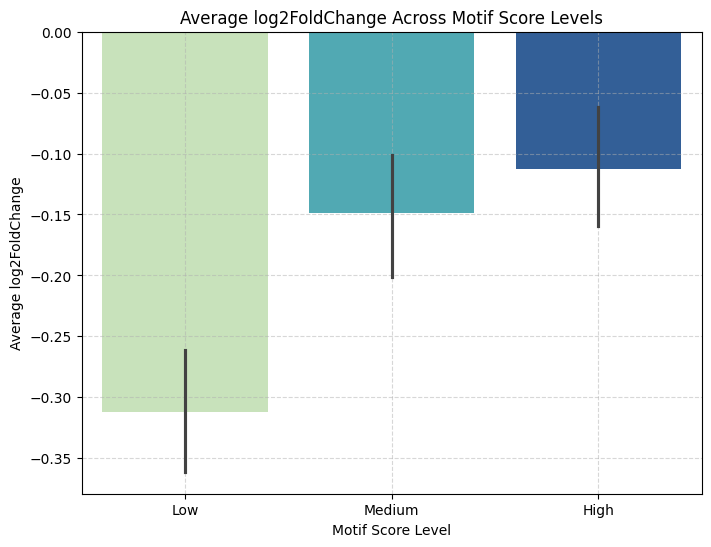

In [5]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load motif scores
motif_df = pd.read_csv("RBP_6kmer_format.csv")  # Update filename if needed

# Load sequence data
sk_df = pd.read_csv("/home/yg2895/media/protein/yg2895/ASO-lib-20250102/motif_analyse/oligo_FC_sk.csv")  # Update filename if needed

# Convert motif scores into a dictionary {6-mer: score}
motif_dict = dict(zip(motif_df["Motif"], motif_df["Score"]))

# Function to extract all 6-mers from position 16-285
def extract_6mers(sequence):
    trimmed_seq = sequence[15:285]  # Extract 16-285 (Python index starts at 0)
    return [trimmed_seq[i:i+6] for i in range(len(trimmed_seq) - 5)]

# Initialize list to store matched scores
matched_data = []

# Process each sequence in the sequence data file
for _, row in sk_df.iterrows():
    sequence = row["Sequence"]
    log2FC = row["log2FoldChange"]

    # Extract 6-mers
    kmers = extract_6mers(sequence)

    # Match 6-mers with known motif scores
    matched_scores = [motif_dict[kmer] for kmer in kmers if kmer in motif_dict]

    # Store results if matches found
    if matched_scores:
        avg_score = sum(matched_scores) / len(matched_scores)  # Average score per sequence
        matched_data.append({"log2FoldChange": log2FC, "Avg_Motif_Score": avg_score})

# Convert results to DataFrame
result_df_sk = pd.DataFrame(matched_data)

# Bin motif scores into categories (Low, Medium, High)
result_df_sk["Motif_Score_Level"] = pd.qcut(result_df_sk["Avg_Motif_Score"], 3, labels=["Low", "Medium", "High"])

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x="Motif_Score_Level", y="log2FoldChange", data=result_df_sk, palette="YlGnBu", ci=95)

# Perform Mann-Whitney U-test for statistical significance
low_values = result_df_sk[result_df_sk["Motif_Score_Level"] == "Low"]["log2FoldChange"]
medium_values = result_df_sk[result_df_sk["Motif_Score_Level"] == "Medium"]["log2FoldChange"]
high_values = result_df_sk[result_df_sk["Motif_Score_Level"] == "High"]["log2FoldChange"]


# Test: Low vs Medium, Medium vs High
low_medium_stat, low_medium_p = mannwhitneyu(low_values, medium_values, alternative='two-sided')
medium_high_stat, medium_high_p = mannwhitneyu(medium_values, high_values, alternative='two-sided')

print(f"Low vs Medium U-stat: {low_medium_stat}, p-value: {low_medium_p}")
print(f"Medium vs High U-stat: {medium_high_stat}, p-value: {medium_high_p}")

# Formatting
plt.xlabel("Motif Score Level")
plt.ylabel("Average log2FoldChange")
plt.title("Average log2FoldChange Across Motif Score Levels")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

/tmp/ipykernel_2602815/873426484.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x="Motif_Score_Level", y="log2FoldChange", hue="Cell Line", data=df_combined, palette='Set3', ci=95)


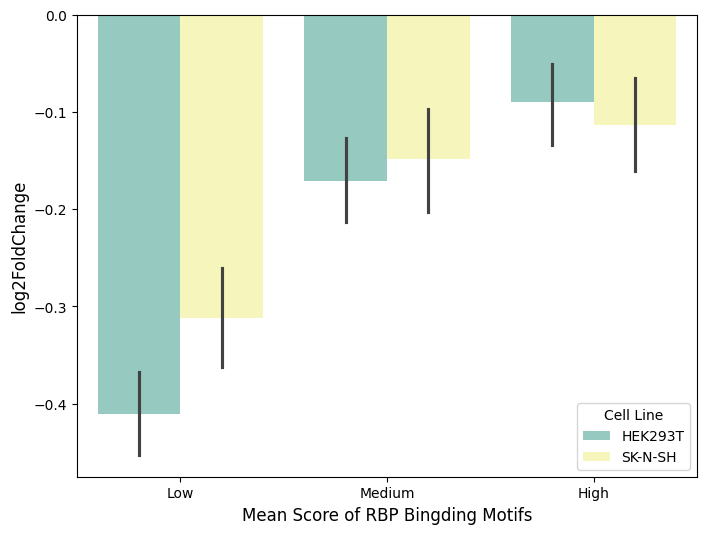

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add a 'Cell Line' column to distinguish them
result_df_hek['Cell Line'] = 'HEK293T'
result_df_sk['Cell Line'] = 'SK-N-SH'

# Concatenate both dataframes into a single one
df_combined = pd.concat([result_df_hek, result_df_sk])
# print(df_combined)

# Create bar plot with hue to differentiate the cell lines
plt.figure(figsize=(8, 6))
sns.barplot(x="Motif_Score_Level", y="log2FoldChange", hue="Cell Line", data=df_combined, palette='Set3', ci=95)

# Add labels and title
plt.xlabel("Mean Score of RBP Bingding Motifs", fontsize=12)
plt.ylabel("log2FoldChange", fontsize=12)

# Show plot
plt.show()

p = 7.963e-78


/tmp/ipykernel_2721292/3036967073.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="FC_Category", y="Max_Motif_Score", data=result_df_sk, palette="coolwarm", showfliers=False)


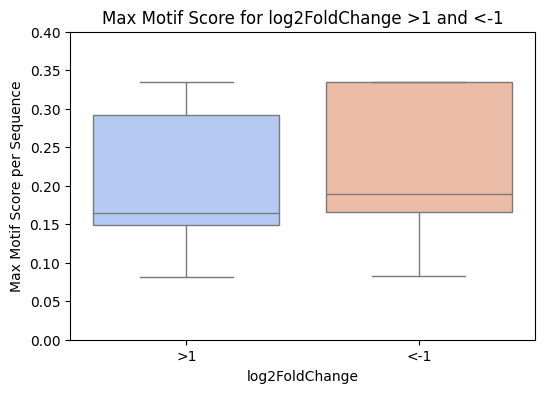

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Load motif scores
motif_df = pd.read_csv("RBP_6kmer_format.csv")  # Update filename if needed
sk_df = pd.read_csv("/home/yg2895/media/protein/yg2895/ASO-lib-20250102/motif_analyse/oligo_FC_sk.csv")  # Update filename if needed

# Convert motif scores into a dictionary {6-mer: score}
motif_dict = dict(zip(motif_df["Motif"], motif_df["Score"]))

# Function to extract all 6-mers from position 16-285
def extract_6mers(sequence):
    trimmed_seq = sequence[15:285]  # Extract 16-285 (Python index starts at 0)
    return [trimmed_seq[i:i+6] for i in range(len(trimmed_seq) - 5)]

# Initialize list to store matched scores
matched_data = []

# Process each sequence in the sequence data file
for _, row in sk_df.iterrows():
    sequence = row["Sequence"]
    log2FC = row["log2FoldChange"]

    # Extract 6-mers
    kmers = extract_6mers(sequence)

    # Match 6-mers with known motif scores
    matched_scores = [motif_dict[kmer] for kmer in kmers if kmer in motif_dict]

    # Store results if matches found
    if matched_scores:
        max_score = max(matched_scores)  # Maximum motif score per sequence
        matched_data.append({"log2FoldChange": log2FC, "Max_Motif_Score": max_score})

# Convert results to DataFrame
result_df_sk = pd.DataFrame(matched_data)

# Categorize sequences based on log2FoldChange
result_df_sk = result_df_sk[abs(result_df_sk["log2FoldChange"]) > 1]  # Remove values in range [-1,1]
result_df_sk["FC_Category"] = result_df_sk["log2FoldChange"].apply(lambda x: ">1" if x > 1 else "<-1")

# Perform Mann-Whitney U test
group1 = result_df_sk[result_df_sk["FC_Category"] == ">1"]["Max_Motif_Score"]
group2 = result_df_sk[result_df_sk["FC_Category"] == "<-1"]["Max_Motif_Score"]

if not group1.empty and not group2.empty:  # Ensure both groups have data
    u_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
else:
    p_value = float('nan')  # Assign NaN if comparison isn't possible

# Plot box plot with all individual values
plt.figure(figsize=(6, 4))
sns.boxplot(x="FC_Category", y="Max_Motif_Score", data=result_df_sk, palette="coolwarm", showfliers=False)
# sns.stripplot(x="FC_Category", y="Max_Motif_Score", data=result_df_sk, color="gray", alpha=0.3, jitter=False)  # Show all points
plt.ylim(0, 0.4)

# Add p-value text
print(f"p = {p_value:.3e}") 

# Customize the plot
plt.xlabel("log2FoldChange")
plt.ylabel("Max Motif Score per Sequence")
plt.title("Max Motif Score for log2FoldChange >1 and <-1")

# Show the plot
plt.show()


## Correlation of RBP motif score and log2FC

In [ ]:
import pandas as pd

# Load motif scores
motif_df = pd.read_csv("RBP_6kmer_format.csv")  
sk_df = pd.read_csv("/home/yg2895/media/protein/yg2895/ASO-lib-20250102/polya_analysis/no_polyA_sk.csv")  

# Convert motif scores into a dictionary for fast lookup
motif_dict = dict(zip(motif_df["Motif"], motif_df["Score"]))  # Ensure column names match

# Function to count matching motifs and calculate motif score
def compute_motif_score(sequence):
    count = 0
    score = 0
    for i in range(16, 285):  # Adjust for Python indexing
        kmer = sequence[i:i+6]
        if kmer in motif_dict:
            count += 1
            score += motif_dict[kmer]
    return count, score

# Apply function to each sequence
sk_df[["Motif_Count", "Motif_Score"]] = sk_df["Sequence"].apply(lambda seq: pd.Series(compute_motif_score(seq)))

# Select relevant columns and drop missing values
result_df_sk = sk_df[['Name',"log2FoldChange", "Motif_Count", "Motif_Score"]].dropna()

# # Load and clean the MFE/GC content data
# df = pd.read_csv('/home/yg2895/media/protein/yg2895/ASO-lib-20250102/RNAstructure.ipynb/Motif_MFE_FC_sk.csv')

# # Merge dataframes on 'Name'
# merge_df = pd.merge(result_df_sk, df[['Name', 'MFE', 'GC_content', 'Sequence']], on='Name', how='inner')

# # Save merged data to a new CSV file (optional)
# merge_df.to_csv("motif_log2FC_sk.csv", index=False)

# print("Merged file saved as 'motif_log2FC_sk.csv'")

Merged file saved as 'motif_log2FC_sk.csv'


Pearson Correlation: -0.3101, P-value: 3.6883e-120


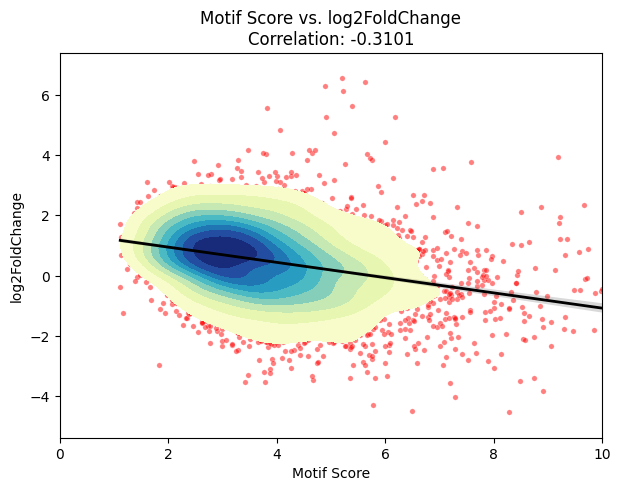

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Drop missing values
result_df_sk = result_df_sk.dropna()

# Compute Pearson correlation
correlation, p_value = pearsonr(result_df_sk["log2FoldChange"], result_df_sk["Motif_Score"])
print(f"Pearson Correlation: {correlation:.4f}, P-value: {p_value:.4e}")

# Create the figure
plt.figure(figsize=(7, 5))

# Scatter plot with point size adjustment
sns.scatterplot(
    x="Motif_Score",
    y="log2FoldChange",
    data=result_df_sk,
    alpha=0.5,  # Transparency for visibility
    s=15,  # Smaller dots
    color="red"
)

# Add density trend using KDE plot
sns.kdeplot(
    x=result_df_sk["Motif_Score"],
    y=result_df_sk["log2FoldChange"],
    fill=True,  # Filled contours for better visualization
    cmap="YlGnBu",
    thresh=0.1
)

# Regression line
sns.regplot(
    x="Motif_Score",
    y="log2FoldChange",
    data=result_df_sk,
    scatter=False,  # Don't plot scatter again
    line_kws={"color": "black", "linewidth": 2}
)

# Customize plot
plt.xlabel("Motif Score")
plt.ylabel("log2FoldChange")
plt.xlim(0,10)
plt.title(f"Motif Score vs. log2FoldChange\nCorrelation: {correlation:.4f}")

# Show plot
plt.show()


### MFE vs RBP

In [2]:
import pandas as pd

# Load motif scores
motif_df = pd.read_csv("RBP_6kmer_format.csv")  
sk_df = pd.read_csv("/home/yg2895/media/protein/yg2895/ASO-lib-20250102/RNAstructure.ipynb/AT_MFE_FC_sk.csv")  

# Convert motif scores into a dictionary for fast lookup
motif_dict = dict(zip(motif_df["Motif"], motif_df["Score"]))  # Ensure column names match

# Function to count matching motifs and calculate motif score
def compute_motif_score(sequence):
    count = 0
    score = 0
    for i in range(16, 285):  # Adjust for Python indexing
        kmer = sequence[i:i+6]
        if kmer in motif_dict:
            count += 1
            score += motif_dict[kmer]
    return count, score

# Apply function to each sequence
sk_df[["Motif_Count", "Motif_Score"]] = sk_df["Sequence"].apply(lambda seq: pd.Series(compute_motif_score(seq)))

# Select relevant columns and drop missing values
result_df_sk = sk_df[["MFE", "Motif_Count", "Motif_Score"]].dropna()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Drop missing values
result_df_sk = result_df_sk.dropna()

# Compute Pearson correlation
correlation, p_value = pearsonr(result_df_sk["MFE"], result_df_sk["Motif_Score"])
print(f"Pearson Correlation: {correlation:.4f}, P-value: {p_value:.4e}")

# Create the figure
plt.figure(figsize=(7, 5))

# Scatter plot with point size adjustment
sns.scatterplot(
    x="Motif_Score",
    y="MFE",
    data=result_df_sk,
    alpha=0.5,  # Transparency for visibility
    s=15,  # Smaller dots
    color="red"
)

# Add density trend using KDE plot
sns.kdeplot(
    x=result_df_sk["Motif_Score"],
    y=result_df_sk["MFE"],
    fill=True,  # Filled contours for better visualization
    cmap="YlGnBu",
    thresh=0.1
)

# Regression line
sns.regplot(
    x="Motif_Score",
    y="MFE",
    data=result_df_sk,
    scatter=False,  # Don't plot scatter again
    line_kws={"color": "black", "linewidth": 2}
)

# Customize plot
plt.xlabel("Motif Score")
plt.ylabel("MFE")
plt.xlim(0,10)
plt.title(f"Motif Score vs. MFE\nCorrelation: {correlation:.4f}")

# Show plot
plt.show()

KeyError: 'MFE'

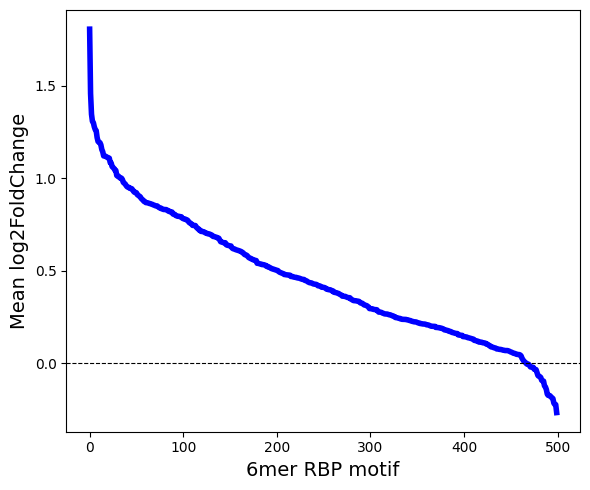

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load motif scores and sequence data efficiently
motif_df = pd.read_csv("RBP_6kmer_format.csv", usecols=["Motif"])
sk_df = pd.read_csv("/home/yg2895/media/protein/yg2895/ASO-lib-20250102/polya_analysis/no_polyA_sk.csv",
                    usecols=["Sequence", "log2FoldChange"])

# Convert motifs into a set for fast lookup
motif_set = set(motif_df["Motif"])

# Optimized function to find motifs using vectorized list comprehension
def find_matching_motifs(sequence):
    """Find 6-mers between 16-285 nt and check for matches in the motif set."""
    return [sequence[i:i+6] for i in range(15, 285) if sequence[i:i+6] in motif_set]

# Apply motif matching to each sequence
sk_df["Matched_Motifs"] = sk_df["Sequence"].apply(find_matching_motifs)

# Explode matched motifs and drop NaN rows efficiently
exploded_df = sk_df.explode("Matched_Motifs").dropna(subset=["Matched_Motifs"])

# Calculate mean log2FC for each motif
mean_log2FC_by_motif = exploded_df.groupby("Matched_Motifs", as_index=False)["log2FoldChange"].mean()

# Sort motifs by mean log2FC for better visualization
mean_log2FC_by_motif = mean_log2FC_by_motif.sort_values("log2FoldChange", ascending=False).reset_index(drop=True)

# Plot mean log2FC using seaborn for cleaner visualization
plt.figure(figsize=(6, 5))
sns.lineplot(data=mean_log2FC_by_motif, x=range(len(mean_log2FC_by_motif)), y="log2FoldChange",
            linestyle="-", linewidth=4, color="blue")

# Add a horizontal reference line at y=0
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)

# Labels and title
plt.xlabel("6mer RBP motif", fontsize=14)
plt.ylabel("Mean log2FoldChange", fontsize=14)
# plt.title("Mean log2FC of Matched 6-mers", fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()


In [10]:
# Print the top 5 and tail 5 motifs
print("Top 5 Motifs based on Mean log2 Fold Change:")
print(mean_log2FC_by_motif.head())

print("\nTail 5 Motifs based on Mean log2 Fold Change:")
print(mean_log2FC_by_motif.tail())

Top 5 Motifs based on Mean log2 Fold Change:
  Matched_Motifs  log2FoldChange
0         CGCGAC        1.806204
1         CGCGGC        1.459032
2         GCGCGA        1.346889
3         CCGGAC        1.307739
4         CGCGCT        1.300898

Tail 5 Motifs based on Mean log2 Fold Change:
    Matched_Motifs  log2FoldChange
495         TATATA       -0.189890
496         AAAAAA       -0.213819
497         ATACAT       -0.221285
498         CATATA       -0.222274
499         ATACAC       -0.265209


In [4]:
exploded_df.to_csv('tep.csv')